In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset from GitHub
data = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno4/main/spam.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()

# Drop unnecessary columns if any exist
data = data[['v1', 'v2']]
data.columns = ['label', 'text']  # Renaming columns for simplicity

# Convert labels to binary (1 for spam, 0 for ham)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 label    0
text     0
dtype: int64


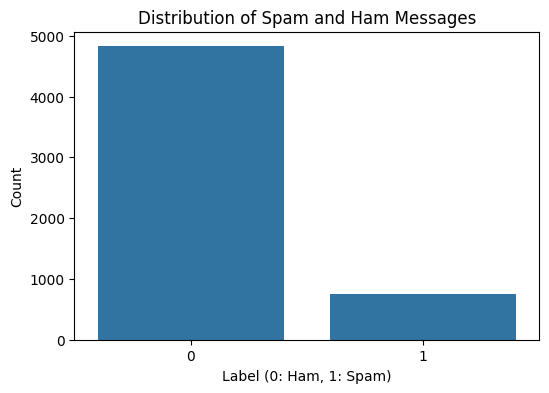

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()


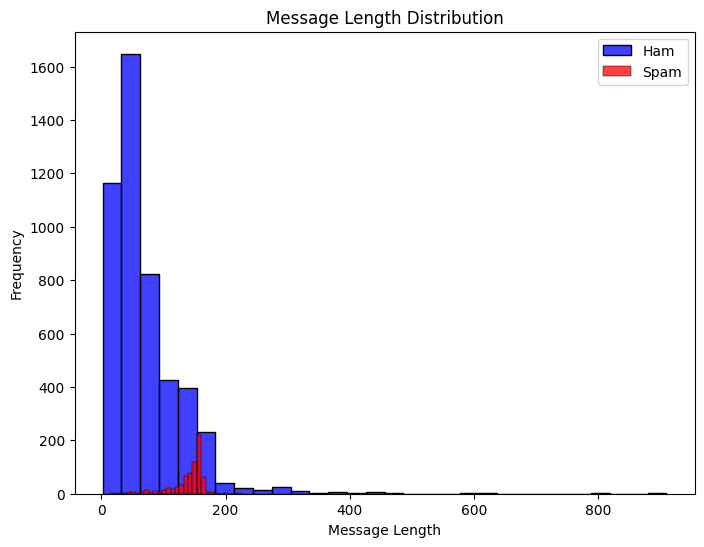

In [15]:
# Add a column for message length
data['length'] = data['text'].apply(len)

# Plot distribution of message length
plt.figure(figsize=(8, 6))
sns.histplot(data[data['label'] == 0]['length'], color='blue', bins=30, label='Ham')
sns.histplot(data[data['label'] == 1]['length'], color='red', bins=30, label='Spam')
plt.legend()
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


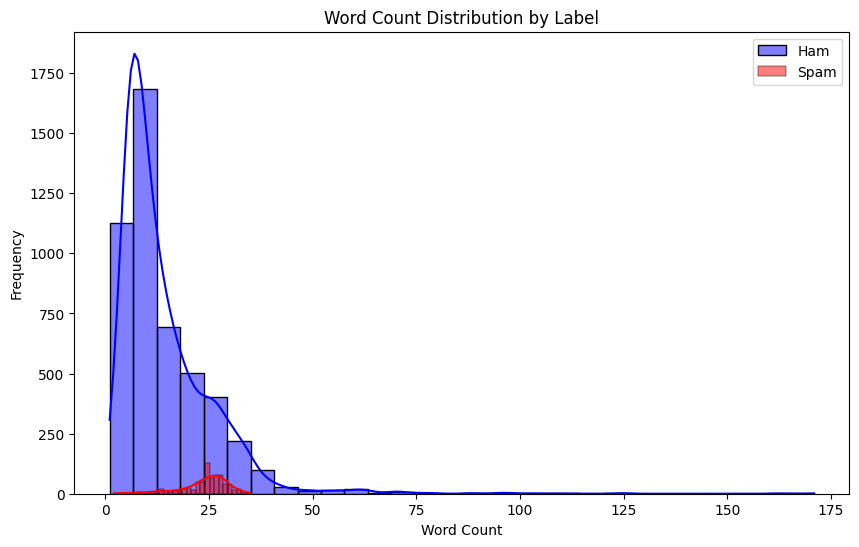

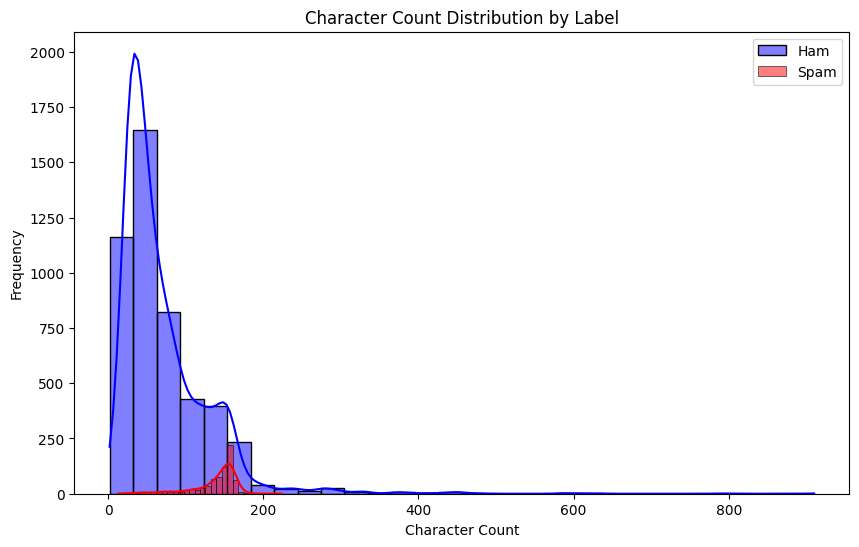

In [16]:
# Create new columns for word count and character length
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
data['char_count'] = data['text'].apply(len)

# Visualize word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['label'] == 0]['word_count'], color='blue', bins=30, label='Ham', kde=True)
sns.histplot(data[data['label'] == 1]['word_count'], color='red', bins=30, label='Spam', kde=True)
plt.legend()
plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Visualize character count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['label'] == 0]['char_count'], color='blue', bins=30, label='Ham', kde=True)
sns.histplot(data[data['label'] == 1]['char_count'], color='red', bins=30, label='Spam', kde=True)
plt.legend()
plt.title('Character Count Distribution by Label')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


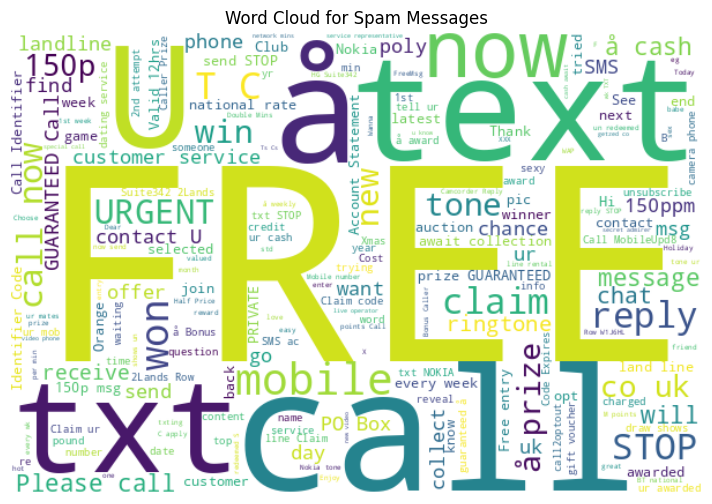

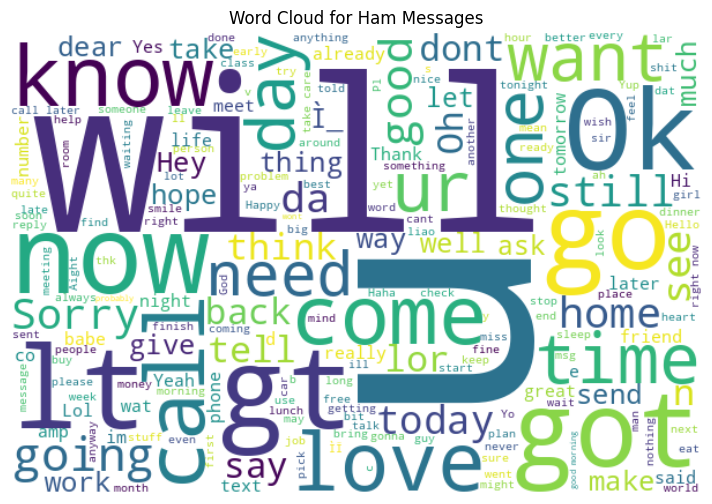

In [18]:
from wordcloud import WordCloud

# Create word clouds for spam and ham messages
spam_words = ' '.join(data[data['label'] == 1]['text'])
ham_words = ' '.join(data[data['label'] == 0]['text'])

# Word cloud for spam messages
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Word cloud for ham messages
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(data['text']).toarray()
y = data['label']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9820627802690582

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



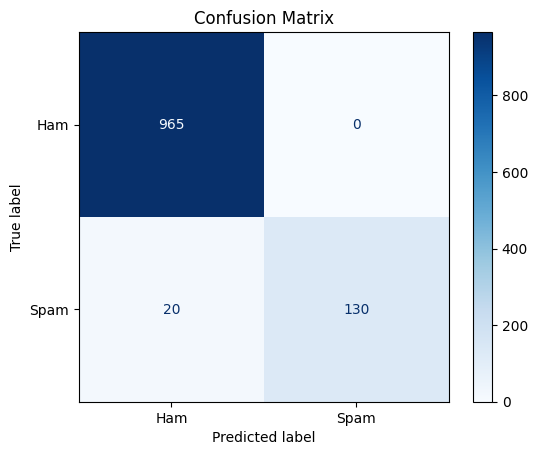

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Ham", "Spam"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


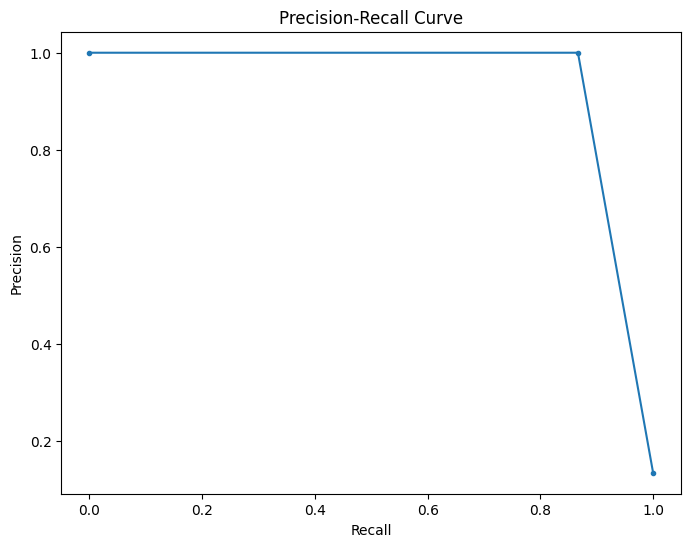

In [23]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [24]:
import numpy as np

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sort features by importance in spam messages
spam_tfidf = model.feature_log_prob_[1]
top_spam_indices = np.argsort(spam_tfidf)[-10:]
top_spam_features = [feature_names[i] for i in top_spam_indices]

# Sort features by importance in ham messages
ham_tfidf = model.feature_log_prob_[0]
top_ham_indices = np.argsort(ham_tfidf)[-10:]
top_ham_features = [feature_names[i] for i in top_ham_indices]

# Display top features
print("Top 10 Spam Features:", top_spam_features)
print("Top 10 Ham Features:", top_ham_features)


Top 10 Spam Features: ['www', 'ur', 'prize', 'reply', 'text', 'stop', 'claim', 'mobile', 'txt', 'free']
Top 10 Ham Features: ['time', 'know', 'got', 'good', 'just', 'gt', 'lt', 'come', 'll', 'ok']


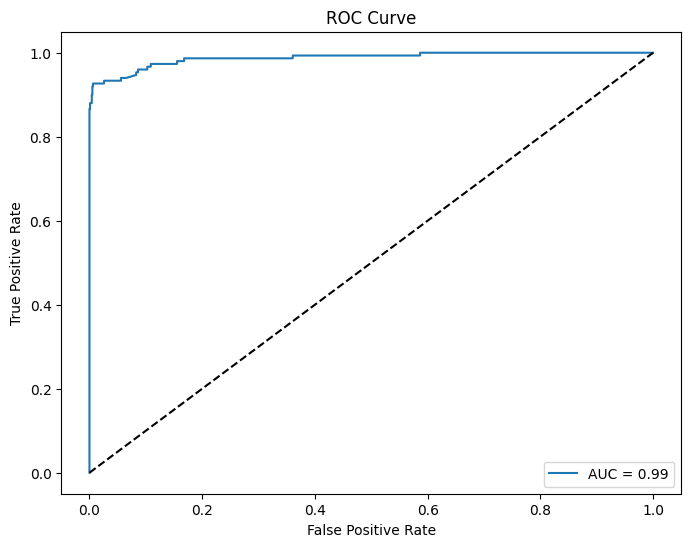

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models
svc_model = SVC(kernel='linear', probability=True)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and test SVM
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, svc_pred))

# Train and test Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, rf_pred))


SVM Model Accuracy: 0.9775784753363229
Random Forest Model Accuracy: 0.97847533632287


In [28]:
# Feature Importance Analysis for Random Forest
feature_importances = rf_model.feature_importances_
top_indices = feature_importances.argsort()[-10:]
top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]

print("Top 10 Important Features in Random Forest Model:", top_features)


Top 10 Important Features in Random Forest Model: ['text', 'prize', '150p', 'stop', 'uk', 'mobile', 'claim', 'www', 'free', 'txt']
